### Анализ гипотез для проекта.

Начальная проверка датасета

In [1]:
import pandas as pd

# Чтение Excel-файла с названием "Baza.xlsx"
df = pd.read_excel("Baza_s_po.xlsx", skiprows=1)
df

,about,gender,height,education,smoking,alcohol,children,age,zodiac,about_len\n(кол-во символов в описании/длина сообщения),...,trait_ohe_MTS-TEST--Экспериментатор,trait_ohe_asAttachmentStyle,Тревожный,Избегающий стиль,Безопасный,likes_received_count,matches_count,likes_given_count,is_premium,photo_count
0,"Для начала общение, потом прогулка (между баше...",m,192.0,Среднее,Нейтрально,Нейтрально,"Нет, но хотелось бы",23,gemini,100,...,0.00,0.0,0.000000,0.000,0.000000,0,0,0,0,5
1,ПЕВЕЦ-СПАСАТЕЛЬ)ДАЛЬШЕ ПРИ ВСТРЕЧЕ),m,170.0,Высшее,Нейтрально,Нейтрально,"Нет, но хотелось бы",34,capricorn,35,...,0.00,0.0,0.000000,0.000,0.000000,2,0,0,0,6
2,"С чувством юмора))) Обожаю петь, танцевать, гр...",f,160.0,Высшее,Нейтрально,Нейтрально,"Нет, но хотелось бы",38,cancer,110,...,1.00,1.0,0.875000,0.250,0.875000,94,11,130,0,6
3,"Ищу теплый летний вайбик \nЗа разговор, адеква...",m,194.0,Среднее,Нейтрально,Нейтрально,Нет,27,libra,130,...,0.00,0.0,0.000000,0.000,0.000000,16,9,44,0,3
4,Люблю юмор и хорошую музыку 🤍,f,180.0,Среднее,Нейтрально,Нейтрально,NaN,20,cancer,29,...,0.75,1.0,0.458333,0.375,1.000000,98,9,60,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,Замужем\nХочу дружить,f,NaN,NaN,Положительно,NaN,NaN,29,aquarius,20,...,0.00,0.0,0.000000,0.000,0.000000,0,0,0,0,5
1055,"Привет👋🏻\nИщу друга/подругу, мб что больше, ка...",m,187.0,Среднее,Нейтрально,Нейтрально,Нет,26,aries,297,...,0.00,1.0,0.541667,0.500,0.583333,2,0,0,0,3
1056,С фотками конечно проблемка некая),m,NaN,NaN,NaN,NaN,NaN,25,aries,34,...,0.00,1.0,0.500000,0.625,0.750000,21,4,213,0,6
1057,"Вместо того, чтобы заниматься любовью мы заним...",m,185.0,NaN,Нейтрально,Нейтрально,"Нет, но хотелось бы",36,taurus,63,...,0.00,0.0,0.000000,0.000,0.000000,0,0,0,0,3


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 70 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   about                                            1059 non-null   object 
 1   gender                                           1059 non-null   object 
 2   height                                           971 non-null    float64
 3   education                                        876 non-null    object 
 4   smoking                                          919 non-null    object 
 5   alcohol                                          860 non-null    object 
 6   children                                         770 non-null    object 
 7   age                                              1059 non-null   int64  
 8   zodiac                                           1059 non-null   object 
 9   about_len                     

In [2]:
column_info = df.dtypes
column_info

about                    object
gender                   object
height                  float64
education                object
smoking                  object
                         ...   
likes_received_count      int64
matches_count             int64
likes_given_count         int64
is_premium                int64
photo_count               int64
Length: 70, dtype: object

In [70]:
df = df.rename(columns={'Интроверсия - экстраверсия': 'introv_extrav'})
df = df.rename(columns={'Консерватизм - открытость новому': 'conservat_opennew'})
df = df.rename(columns={'Сдержанность - эмоциональность': 'restraint_emotionality'})
df = df.rename(columns={'Прямолинейность - доброжелательность': 'straightforwardness_benevolence'})
df = df.rename(columns={'Неорганизованность - ответсвенность': 'organization_responsibility'})
df = df.rename(columns={'about_len\n(кол-во символов в описании/длина сообщения)': 'about_len'})
df = df.rename(columns={'Тревожный': 'anxious'})
df = df.rename(columns={'Безопасный': 'safe'})
df = df.rename(columns={'Избегающий стиль': 'avoidant style'})

In [72]:
df.isnull().sum().to_dict()

{'about': 0,
 'gender': 0,
 'height': 85,
 'education': 179,
 'smoking': 137,
 'alcohol': 195,
 'children': 285,
 'age': 0,
 'zodiac': 0,
 'about_len': 0,
 'city': 562,
 'interests': 929,
 'languages': 460,
 'target': 112,
 'introv_extrav': 0,
 'conservat_opennew': 0,
 'restraint_emotionality': 0,
 'straightforwardness_benevolence': 0,
 'organization_responsibility': 0,
 'ENFJ': 0,
 'ENFP': 0,
 'ENTJ': 0,
 'ENTP': 0,
 'ESFJ': 0,
 'ESFP': 0,
 'ESTJ': 0,
 'ESTP': 0,
 'INFJ': 0,
 'INFP': 0,
 'INTJ': 0,
 'INTP': 0,
 'ISFJ': 0,
 'ISFP': 0,
 'ISTJ': 0,
 'ISTP': 0,
 'anxious': 0,
 'avoidant style': 0,
 'safe': 0,
 'likes_received_count': 0,
 'matches_count': 0,
 'likes_given_count': 0,
 'is_premium': 0,
 'photo_count': 0}

In [ ]:
df = df.dropna(subset=['introv_extrav'])

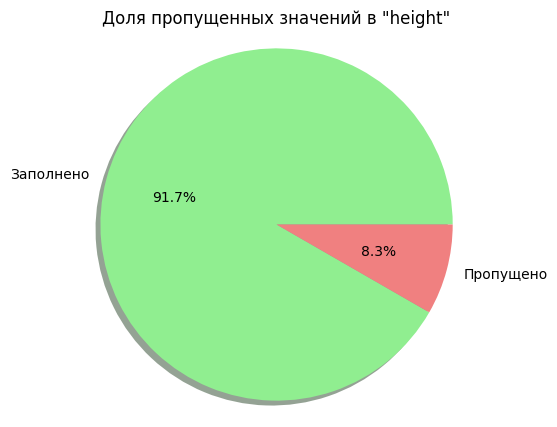

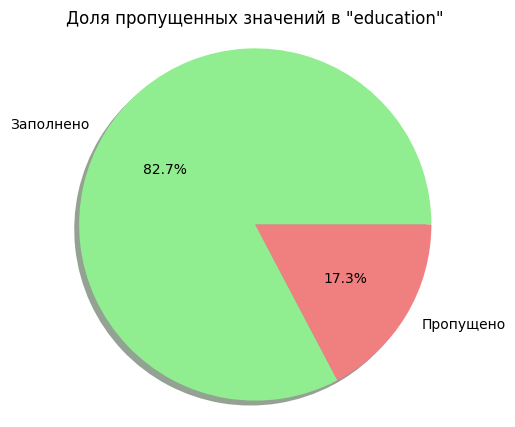

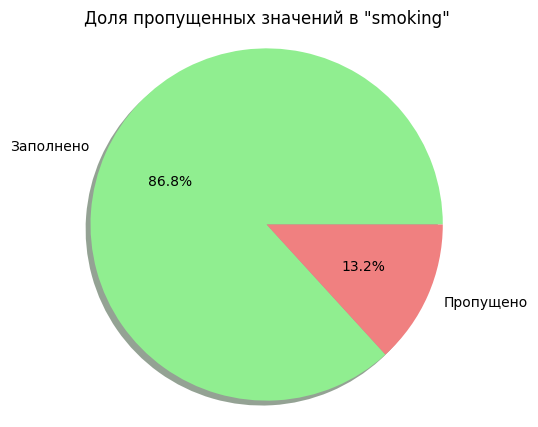

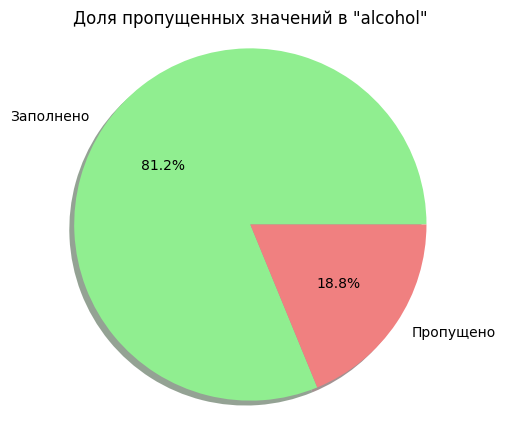

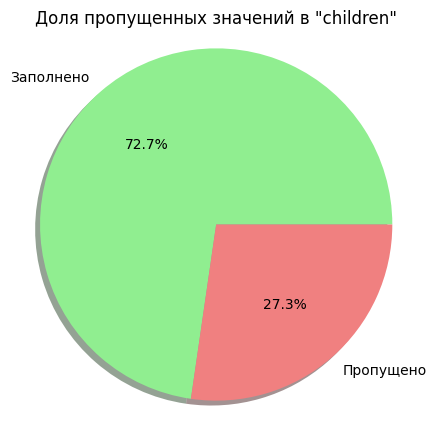

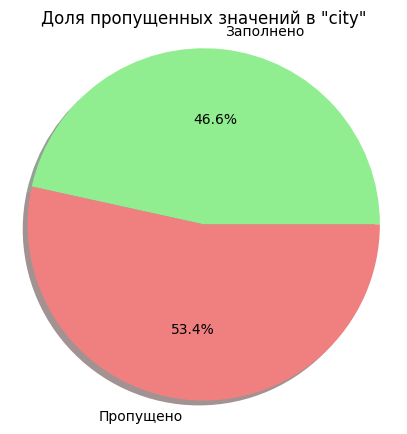

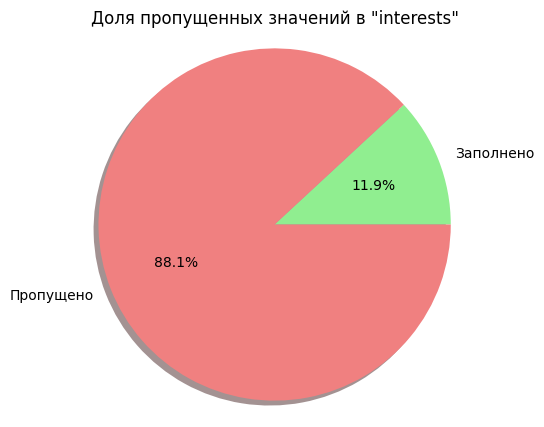

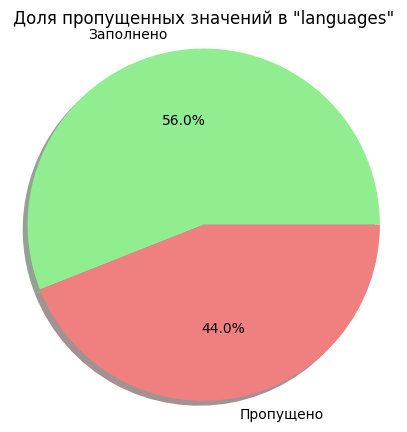

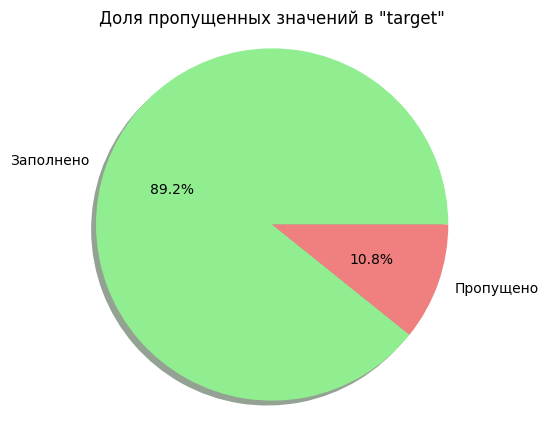

In [ ]:
columns = [ 'height', 'education', 'smoking', 'alcohol',
       'children', 'city', 'interests',
       'languages', 'target']

for col in columns:
    nan = df[col].isnull().sum()
    total = df[col].count()
    data = [total, nan]
    labels = ['Заполнено', 'Пропущено']

    # Создание графика
    plt.figure(figsize=(5, 5))
    plt.pie(data, labels=labels, colors=['lightgreen', 'lightcoral'], autopct='%1.1f%%',
            shadow=True, wedgeprops={'lw': 0, 'edgecolor': "k"})
    plt.axis('equal')
    plt.title(f'Доля пропущенных значений в "{col}"')
    plt.show()

In [75]:
selected_columns = ['about', 'gender', 'height', 'education', 'smoking', 'alcohol',
       'children', 'age', 'zodiac', 'about_len', 'city', 'interests',
       'languages', 'target', 'introv_extrav', 'conservat_opennew',
       'restraint_emotionality', 'straightforwardness_benevolence',
       'organization_responsibility', 'ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ',
       'ESFP', 'ESTJ', 'ESTP', 'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP',
       'ISTJ', 'ISTP', 'anxious', 'avoidant style', 'safe', 'likes_received_count',
       'matches_count', 'likes_given_count', 'is_premium', 'photo_count']
df_work = df[selected_columns]
df_work

,about,gender,height,education,smoking,alcohol,children,age,zodiac,about_len,...,ISTJ,ISTP,anxious,avoidant style,safe,likes_received_count,matches_count,likes_given_count,is_premium,photo_count
0,"Для начала общение, потом прогулка (между баше...",m,192.0,Среднее,Нейтрально,Нейтрально,"Нет, но хотелось бы",23,gemini,100,...,0.0,0.0,0.000000,0.000,0.000000,0,0,0,0,5
1,ПЕВЕЦ-СПАСАТЕЛЬ)ДАЛЬШЕ ПРИ ВСТРЕЧЕ),m,170.0,Высшее,Нейтрально,Нейтрально,"Нет, но хотелось бы",34,capricorn,35,...,0.0,0.0,0.000000,0.000,0.000000,2,0,0,0,6
2,"С чувством юмора))) Обожаю петь, танцевать, гр...",f,160.0,Высшее,Нейтрально,Нейтрально,"Нет, но хотелось бы",38,cancer,110,...,0.0,0.0,0.875000,0.250,0.875000,94,11,130,0,6
3,"Ищу теплый летний вайбик \nЗа разговор, адеква...",m,194.0,Среднее,Нейтрально,Нейтрально,Нет,27,libra,130,...,0.0,0.0,0.000000,0.000,0.000000,16,9,44,0,3
4,Люблю юмор и хорошую музыку 🤍,f,180.0,Среднее,Нейтрально,Нейтрально,NaN,20,cancer,29,...,0.0,0.0,0.458333,0.375,1.000000,98,9,60,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,Замужем\nХочу дружить,f,NaN,NaN,Положительно,NaN,NaN,29,aquarius,20,...,0.0,0.0,0.000000,0.000,0.000000,0,0,0,0,5
1055,"Привет👋🏻\nИщу друга/подругу, мб что больше, ка...",m,187.0,Среднее,Нейтрально,Нейтрально,Нет,26,aries,297,...,0.0,0.0,0.541667,0.500,0.583333,2,0,0,0,3
1056,С фотками конечно проблемка некая),m,NaN,NaN,NaN,NaN,NaN,25,aries,34,...,0.0,0.0,0.500000,0.625,0.750000,21,4,213,0,6
1057,"Вместо того, чтобы заниматься любовью мы заним...",m,185.0,NaN,Нейтрально,Нейтрально,"Нет, но хотелось бы",36,taurus,63,...,0.0,0.0,0.000000,0.000,0.000000,0,0,0,0,3


In [94]:
df_work.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1051 entries, 0 to 1058
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   about                            1051 non-null   object 
 1   gender                           1051 non-null   object 
 2   height                           966 non-null    float64
 3   education                        872 non-null    object 
 4   smoking                          914 non-null    object 
 5   alcohol                          856 non-null    object 
 6   children                         766 non-null    object 
 7   age                              1051 non-null   int64  
 8   zodiac                           1051 non-null   object 
 9   about_len                        1051 non-null   int64  
 10  city                             489 non-null    object 
 11  interests                        122 non-null    object 
 12  languages                

In [95]:
df_work.describe() # <-- Описание df

,height,age,about_len,introv_extrav,conservat_opennew,restraint_emotionality,straightforwardness_benevolence,organization_responsibility,ENFJ,ENFP,...,ISTJ,ISTP,anxious,avoidant style,safe,likes_received_count,matches_count,likes_given_count,is_premium,photo_count
count,966.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,...,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.00000,1051.000000
mean,173.879917,27.598478,96.182683,0.743736,0.798208,0.360133,0.727878,0.657152,0.050428,0.070409,...,0.073264,0.025690,0.243815,0.217888,0.331510,52.155090,5.517602,68.803996,0.05804,4.411989
std,10.906293,7.280016,98.508839,0.198424,0.189267,0.250941,0.190636,0.219250,0.218931,0.255957,...,0.260693,0.158284,0.298405,0.277179,0.390728,130.007933,21.399920,281.758643,0.23393,1.718972
min,50.000000,18.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000
25%,167.000000,22.000000,30.000000,0.583333,0.666667,0.166667,0.583333,0.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,3.000000
50%,175.000000,26.000000,61.000000,0.750000,0.833333,0.333333,0.750000,0.666667,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.00000,5.000000
75%,180.000000,32.000000,123.500000,0.916667,1.000000,0.500000,0.916667,0.833333,0.000000,0.000000,...,0.000000,0.000000,0.541667,0.458333,0.750000,38.000000,1.000000,3.000000,0.00000,6.000000
max,250.000000,64.000000,500.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1339.000000,264.000000,3848.000000,1.00000,7.000000


### BIG Five

In [82]:
selected_columns = ["introv_extrav", "conservat_opennew", "restraint_emotionality", "straightforwardness_benevolence", "organization_responsibility"]
BIG_FIVE = df_work[selected_columns]

print("Новый датафрейм BIG_FIVE: ")
BIG_FIVE

Новый датафрейм BIG_FIVE: 


,introv_extrav,conservat_opennew,restraint_emotionality,straightforwardness_benevolence,organization_responsibility
0,1.000000,1.000000,0.000000,1.000000,1.000000
1,1.000000,0.750000,0.333333,0.833333,0.750000
2,0.750000,0.750000,0.250000,1.000000,1.000000
3,0.500000,0.666667,0.250000,0.416667,1.000000
4,1.000000,1.000000,0.250000,1.000000,0.750000
...,...,...,...,...,...
1054,0.833333,0.833333,0.916667,0.250000,0.500000
1055,0.833333,0.250000,1.000000,0.416667,0.000000
1056,0.666667,1.000000,0.833333,0.500000,0.416667
1057,0.916667,0.916667,0.000000,0.916667,0.833333


In [83]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd

# def plot_memtable(df):
#     plt.figure(figsize=(15, 10))
#     sns.heatmap(df, annot=True, cmap="coolwarm", linewidths=0.5)

#     plt.xticks(rotation=45, ha='right', fontsize=12)
#     plt.yticks(rotation=0, fontsize=12)
#     plt.xlabel('Personality Traits', fontsize=14)
#     plt.ylabel('Index', fontsize=14)
#     plt.title('Big Five Personality Traits Heatmap', fontsize=16)
#     plt.show()


# plot_memtable(BIG_FIVE)


### Проверка всех уникальных значений в каждом столбце

In [84]:
unique_values_introv_extrav = BIG_FIVE['introv_extrav'].unique()
unique_values_introv_extrav

array([1.        , 0.75      , 0.5       , 0.66666667, 0.58333333,
       0.91666667, 0.33333333, 0.83333333, 0.25      , 0.16666667,
       0.41666667, 0.        , 0.08333333])

In [85]:
unique_values_conservat_opennew = BIG_FIVE['conservat_opennew'].unique()
unique_values_conservat_opennew

array([1.        , 0.75      , 0.66666667, 0.5       , 0.91666667,
       0.83333333, 0.58333333, 0.41666667, 0.25      , 0.        ,
       0.33333333, 0.16666667, 0.08333333])

In [86]:
unique_values_restraint_emotionality = BIG_FIVE['restraint_emotionality'].unique()
unique_values_restraint_emotionality

array([0.        , 0.33333333, 0.25      , 0.41666667, 0.16666667,
       0.08333333, 1.        , 0.66666667, 0.5       , 0.83333333,
       0.58333333, 0.75      , 0.91666667])

In [87]:
unique_values_straightforwardness_benevolence = BIG_FIVE['straightforwardness_benevolence'].unique()
unique_values_straightforwardness_benevolence

array([1.        , 0.83333333, 0.41666667, 0.58333333, 0.66666667,
       0.91666667, 0.75      , 0.5       , 0.33333333, 0.25      ,
       0.08333333, 0.16666667, 0.        ])

In [88]:
unique_values_organization_responsibility = BIG_FIVE['organization_responsibility'].unique()
unique_values_organization_responsibility

array([1.        , 0.75      , 0.83333333, 0.5       , 0.66666667,
       0.91666667, 0.41666667, 0.16666667, 0.58333333, 0.25      ,
       0.33333333, 0.08333333, 0.        ])

### Подсчёт значений

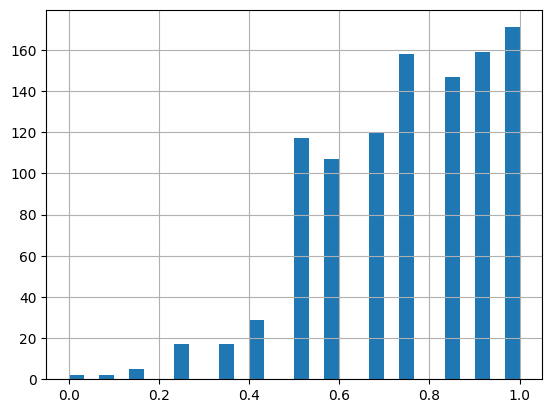

In [96]:
BIG_FIVE['introv_extrav'].hist(bins=30);

In [98]:
BIG_FIVE["introv_extrav"].value_counts()

introv_extrav
1.000000    171
0.916667    159
0.750000    158
0.833333    147
0.666667    120
0.500000    117
0.583333    107
0.416667     29
0.333333     17
0.250000     17
0.166667      5
0.000000      2
0.083333      2
Name: count, dtype: int64

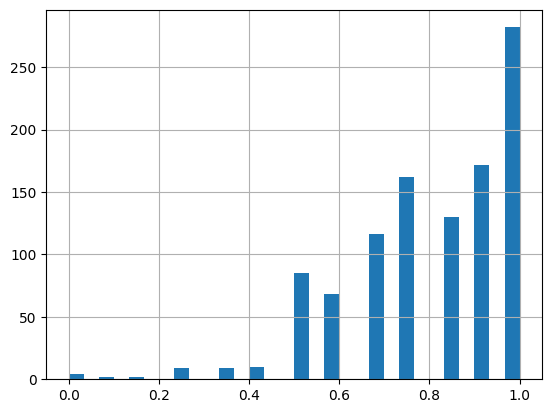

In [99]:
BIG_FIVE['conservat_opennew'].hist(bins=30);

In [90]:
BIG_FIVE["conservat_opennew"].value_counts()

conservat_opennew
1.000000    282
0.916667    172
0.750000    162
0.833333    130
0.666667    116
0.500000     85
0.583333     68
0.416667     10
0.250000      9
0.333333      9
0.000000      4
0.166667      2
0.083333      2
Name: count, dtype: int64

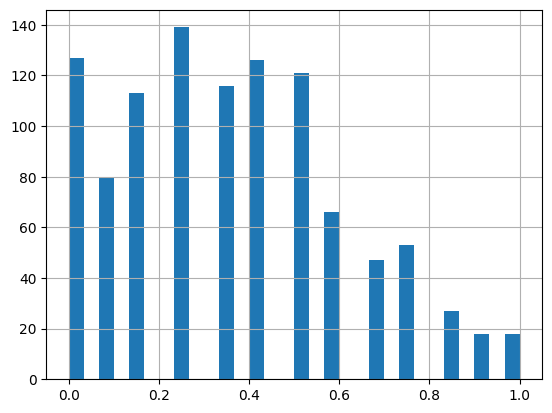

In [100]:
BIG_FIVE['restraint_emotionality'].hist(bins=30);

In [91]:
BIG_FIVE["restraint_emotionality"].value_counts()

restraint_emotionality
0.250000    139
0.000000    127
0.416667    126
0.500000    121
0.333333    116
0.166667    113
0.083333     80
0.583333     66
0.750000     53
0.666667     47
0.833333     27
1.000000     18
0.916667     18
Name: count, dtype: int64

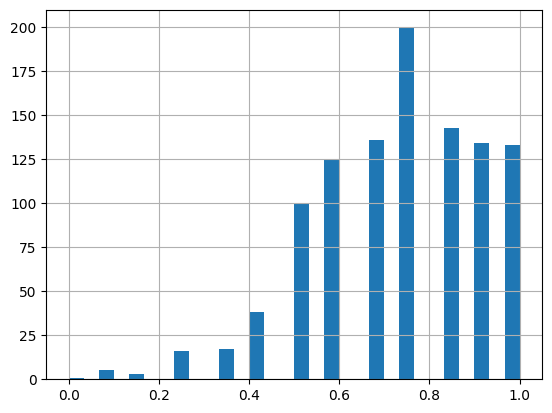

In [101]:
BIG_FIVE['straightforwardness_benevolence'].hist(bins=30);

In [92]:
BIG_FIVE["straightforwardness_benevolence"].value_counts()

straightforwardness_benevolence
0.750000    200
0.833333    143
0.666667    136
0.916667    134
1.000000    133
0.583333    125
0.500000    100
0.416667     38
0.333333     17
0.250000     16
0.083333      5
0.166667      3
0.000000      1
Name: count, dtype: int64

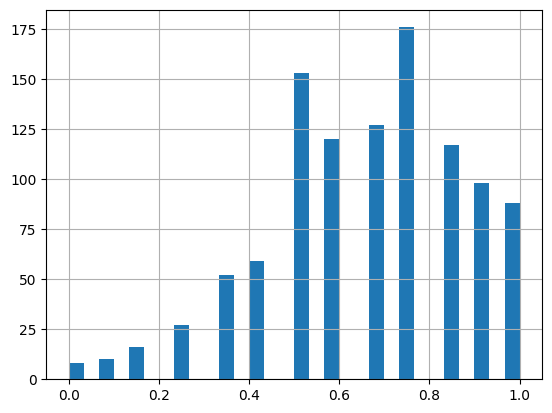

In [102]:
BIG_FIVE['organization_responsibility'].hist(bins=30);

In [93]:
BIG_FIVE["organization_responsibility"].value_counts()

organization_responsibility
0.750000    176
0.500000    153
0.666667    127
0.583333    120
0.833333    117
0.916667     98
1.000000     88
0.416667     59
0.333333     52
0.250000     27
0.166667     16
0.083333     10
0.000000      8
Name: count, dtype: int64

### MBTI 

c

In [ ]:
# Выбор нужных столбцов
selected_columns = ["ENFJ", "ENFP", "ENTJ", "ENTP", "ESFJ", "ESFP",
                    "ESTJ", "ESTP", "INFJ", "INFP", "INTJ", "INTP",
                    "ISFJ", "ISFP", "ISTJ", "ISTP"]
MBTI = df_work[selected_columns]

print("Новый датафрейм MBTI: ")
MBTI

Новый датафрейм MBTI: 


,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1055,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1056,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [108]:
MBTI.describe()

,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
count,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000
mean,0.050428,0.070409,0.023787,0.019981,0.070409,0.063749,0.081827,0.028544,0.028544,0.051380,0.016175,0.006660,0.067555,0.037108,0.073264,0.025690
std,0.218931,0.255957,0.152457,0.140001,0.255957,0.244421,0.274231,0.166601,0.166601,0.220876,0.126209,0.081377,0.251100,0.189115,0.260693,0.158284
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [110]:
MBTI.value_counts()

ENFJ  ENFP  ENTJ  ENTP  ESFJ  ESFP  ESTJ  ESTP  INFJ  INFP  INTJ  INTP  ISFJ  ISFP  ISTJ  ISTP
0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0     299
                                    1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0      86
                                    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0      77
      1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0      74
      0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0      74
                        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0      71
                              1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0      67
                              0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0      54
1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

## Гипотезы

Гипотеза 1
Демографические характеристики пользователей (такие как возраст, пол, образование) значительно влияют на их активность и успешность взаимодействий.

In [114]:

# Анализ успешности взаимодействий
print("\nСреднее количество лайков, полученных пользователями:")
print(df_work["likes_received_count"].median())

print("\nСреднее количество лайков, поставленных пользователями:")
print(df_work["likes_given_count"].median())

print("\nСреднее количество мэтчей:")
print(df_work["matches_count"].median())

print("\nКорреляция между количеством лайков и мэтчами:")
print(df_work[["likes_received_count", "matches_count"]].corr())

print("\nКоличество пользователей с подпиской Premium:")
print(df_work["is_premium"].sum())


Среднее количество лайков, полученных пользователями:
5.0

Среднее количество лайков, поставленных пользователями:
0.0

Среднее количество мэтчей:
0.0

Корреляция между количеством лайков и мэтчами:
                      likes_received_count  matches_count
likes_received_count              1.000000       0.558706
matches_count                     0.558706       1.000000

Количество пользователей с подпиской Premium:
61


C:\Users\masik-saar\AppData\Local\Temp\ipykernel_18872\3195423068.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_work['gender'] = df_work['gender'].astype('category')
C:\Users\masik-saar\AppData\Local\Temp\ipykernel_18872\3195423068.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_work['education'] = df_work['education'].astype('category')


gender -> likes_received_count: t-test p-value = 0.00000
gender -> matches_count: t-test p-value = 0.90369
education -> likes_received_count: ANOVA p-value = 0.24385
education -> matches_count: ANOVA p-value = 0.05126


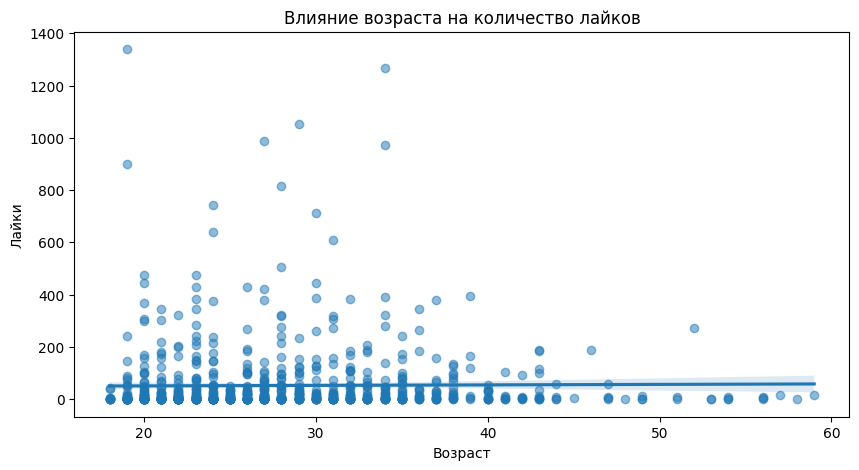

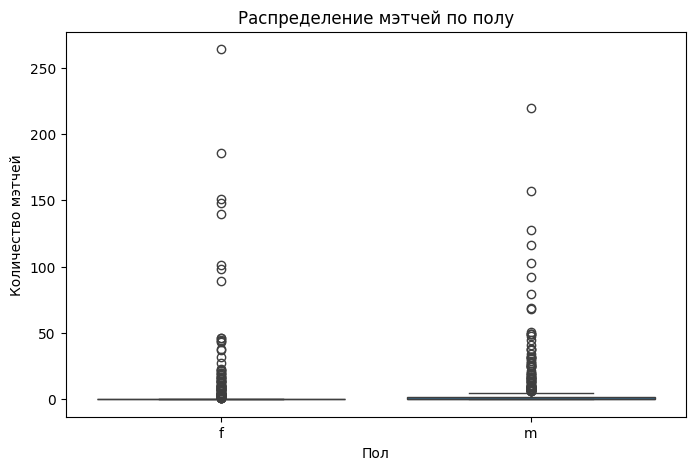

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, f_oneway

# Удаляем строки с пропущенными значениями в ключевых столбцах
df_work = df_work.dropna(subset=['gender', 'age', 'education', 'likes_received_count', 'matches_count'])

# Преобразуем категориальные переменные
df_work['gender'] = df_work['gender'].astype('category')
df_work['education'] = df_work['education'].astype('category')

# Функция для сравнения групп
def compare_groups(df, group_col, target_col):
    groups = df[group_col].unique()
    group_data = [df[df[group_col] == g][target_col].dropna() for g in groups]

    if len(groups) == 2:  # t-тест для двух групп
        stat, p = ttest_ind(group_data[0], group_data[1], equal_var=False)
        print(f"{group_col} -> {target_col}: t-test p-value = {p:.5f}")
    else:  # ANOVA для нескольких групп
        stat, p = f_oneway(*group_data)
        print(f"{group_col} -> {target_col}: ANOVA p-value = {p:.5f}")

# Сравнение по полу
compare_groups(df_work, 'gender', 'likes_received_count')
compare_groups(df_work, 'gender', 'matches_count')

# Сравнение по образованию
compare_groups(df_work, 'education', 'likes_received_count')
compare_groups(df_work, 'education', 'matches_count')

# Визуализация: распределение лайков по возрасту
plt.figure(figsize=(10,5))
sns.regplot(x='age', y='likes_received_count', data=df_work, scatter_kws={'alpha':0.5})
plt.title("Влияние возраста на количество лайков")
plt.xlabel("Возраст")
plt.ylabel("Лайки")
plt.show()

# Визуализация: распределение мэтчей по полу
plt.figure(figsize=(8,5))
sns.boxplot(x='gender', y='matches_count', data=df_work)
plt.title("Распределение мэтчей по полу")
plt.xlabel("Пол")
plt.ylabel("Количество мэтчей")
plt.show()


Гипотеза 2. Количество фотографий, загруженных пользователем, коррелируют с уровнем интереса к нему со стороны других пользователей.

Корреляция между количеством фото и лайками: r=0.082, p-value=0.01537
Корреляция между количеством фото и мэтчами: r=0.082, p-value=0.01512


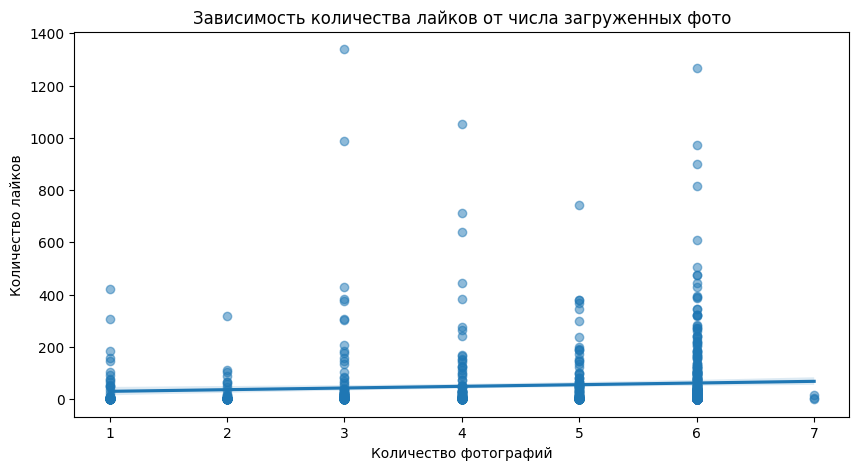

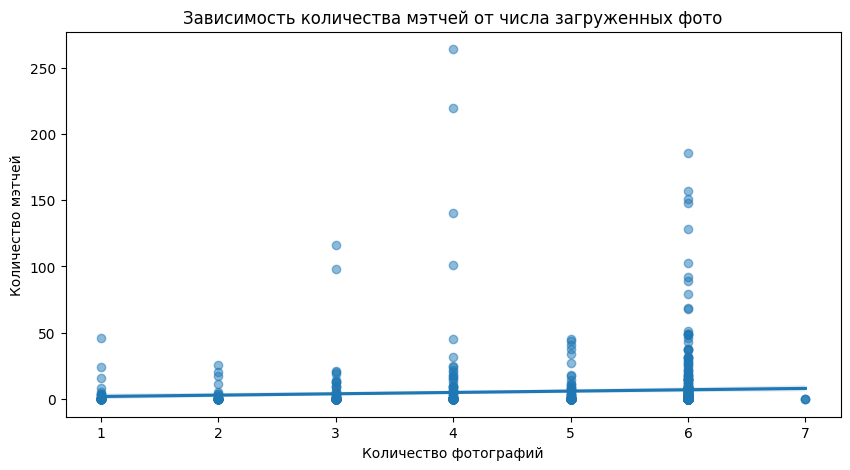

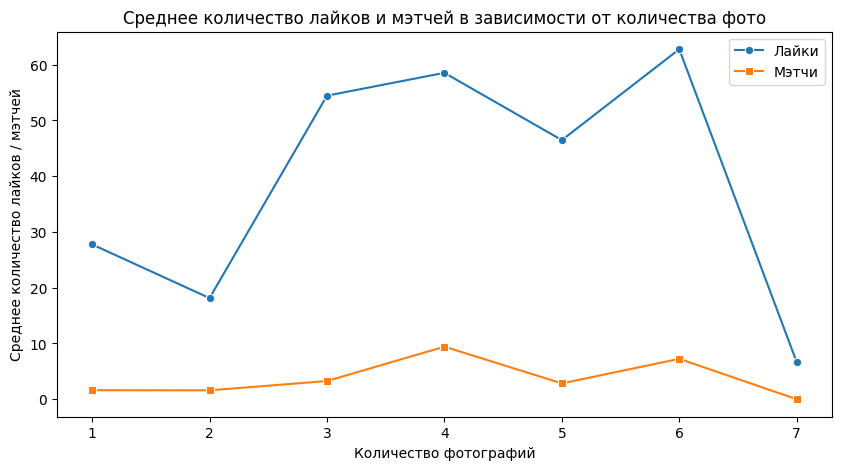

In [120]:
from scipy.stats import pearsonr

# Удаляем строки с пропущенными значениями в ключевых столбцах
df_work = df_work.dropna(subset=['photo_count', 'likes_received_count', 'matches_count'])

# Корреляция Пирсона
corr_likes, p_likes = pearsonr(df_work['photo_count'], df_work['likes_received_count'])
corr_matches, p_matches = pearsonr(df_work['photo_count'], df_work['matches_count'])

print(f"Корреляция между количеством фото и лайками: r={corr_likes:.3f}, p-value={p_likes:.5f}")
print(f"Корреляция между количеством фото и мэтчами: r={corr_matches:.3f}, p-value={p_matches:.5f}")

# Визуализация: зависимость количества фото от лайков
plt.figure(figsize=(10,5))
sns.regplot(x='photo_count', y='likes_received_count', data=df_work, scatter_kws={'alpha':0.5})
plt.title("Зависимость количества лайков от числа загруженных фото")
plt.xlabel("Количество фотографий")
plt.ylabel("Количество лайков")
plt.show()

# Визуализация: зависимость количества фото от мэтчей
plt.figure(figsize=(10,5))
sns.regplot(x='photo_count', y='matches_count', data=df_work, scatter_kws={'alpha':0.5})
plt.title("Зависимость количества мэтчей от числа загруженных фото")
plt.xlabel("Количество фотографий")
plt.ylabel("Количество мэтчей")
plt.show()

# Группировка по количеству фото
df_grouped = df_work.groupby('photo_count')[['likes_received_count', 'matches_count']].mean().reset_index()

# Визуализация среднего количества лайков и мэтчей по числу фотографий
plt.figure(figsize=(10,5))
sns.lineplot(x='photo_count', y='likes_received_count', data=df_grouped, marker='o', label='Лайки')
sns.lineplot(x='photo_count', y='matches_count', data=df_grouped, marker='s', label='Мэтчи')
plt.title("Среднее количество лайков и мэтчей в зависимости от количества фото")
plt.xlabel("Количество фотографий")
plt.ylabel("Среднее количество лайков / мэтчей")
plt.legend()
plt.show()


Гипотеза 3. Пользователи проявляют устойчивые предпочтения в отношении образования потенциального партнера.

ANOVA: p-value = 0.24385
Нет значимых различий в количестве лайков по уровням образования.


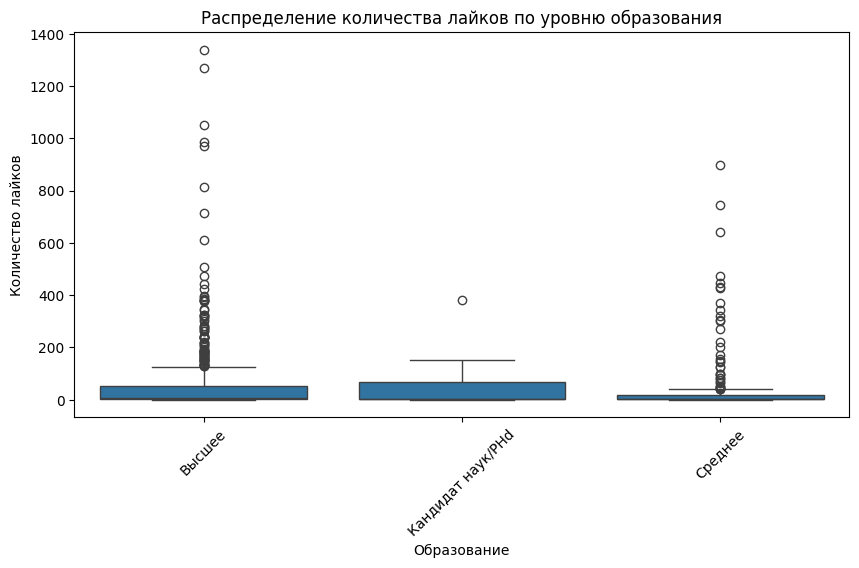

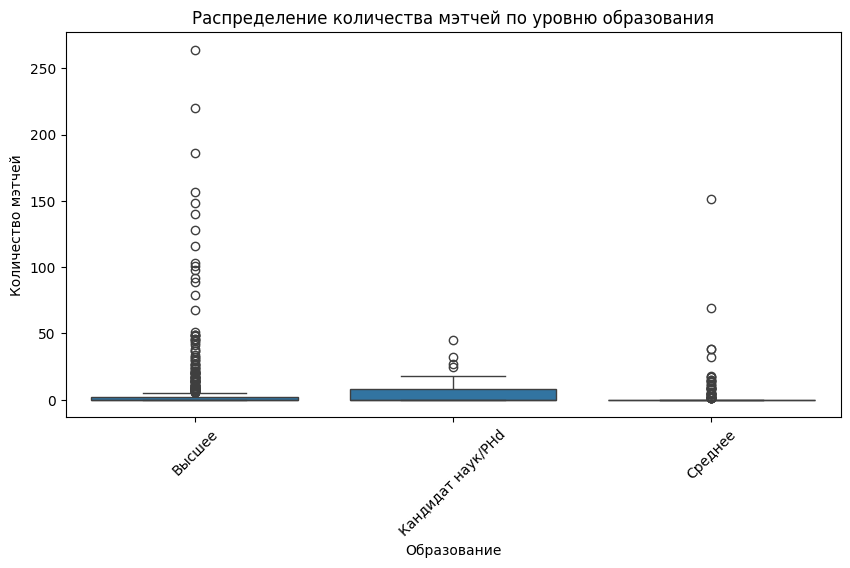

In [121]:
from scipy.stats import chi2_contingency, f_oneway

# Удаляем строки с пропущенными значениями в ключевых столбцах
df_work = df_work.dropna(subset=['education', 'likes_received_count', 'matches_count'])

# Проверка зависимости между образованием пользователей и их мэтчей (предполагаем, что у нас есть поле 'partner_education')
if 'partner_education' in df.columns:
    contingency_table = pd.crosstab(df_work['education'], df_work['partner_education'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"Хи-квадрат тест: p-value = {p:.5f}")
    if p < 0.05:
        print("Зависимость между образованием пользователя и его мэтчами статистически значима.")
    else:
        print("Зависимость между образованием пользователя и его мэтчами НЕ значима.")

# Сравнение лайков по уровню образования (ANOVA)
edu_groups = [df_work[df_work['education'] == edu]['likes_received_count'] for edu in df_work['education'].unique()]
stat, p_anova = f_oneway(*edu_groups)
print(f"ANOVA: p-value = {p_anova:.5f}")
if p_anova < 0.05:
    print("Есть значимые различия в количестве полученных лайков между разными уровнями образования.")
else:
    print("Нет значимых различий в количестве лайков по уровням образования.")

# Визуализация: распределение лайков по образованию
plt.figure(figsize=(10,5))
sns.boxplot(x='education', y='likes_received_count', data=df_work)
plt.title("Распределение количества лайков по уровню образования")
plt.xlabel("Образование")
plt.ylabel("Количество лайков")
plt.xticks(rotation=45)
plt.show()

# Визуализация: распределение мэтчей по образованию
plt.figure(figsize=(10,5))
sns.boxplot(x='education', y='matches_count', data=df_work)
plt.title("Распределение количества мэтчей по уровню образования")
plt.xlabel("Образование")
plt.ylabel("Количество мэтчей")
plt.xticks(rotation=45)
plt.show()


Гипотеза 4. Пользователи предпочитают выбирать потенциальных партнеров с определенным диапазоном роста, который соответствует их личным представлениям о физической привлекательности

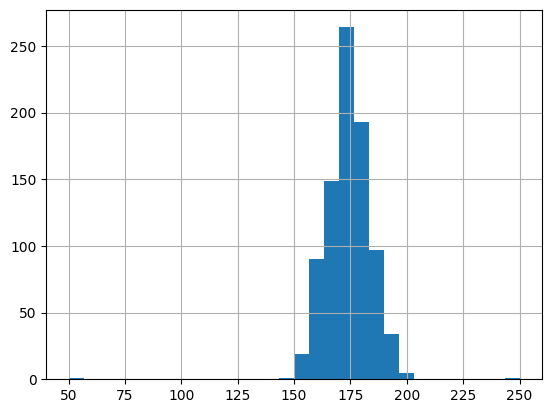

In [124]:
df_work['height'].hist(bins=30);

Уникальные значения gender: ['m' 'f']


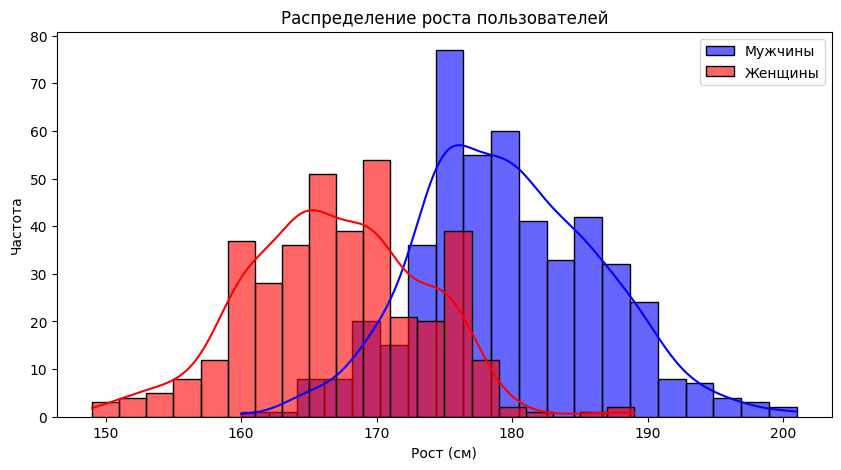

height_group
165-175    314
175-185    265
155-165    165
185-195     85
<155        17
195+         6
Name: count, dtype: int64


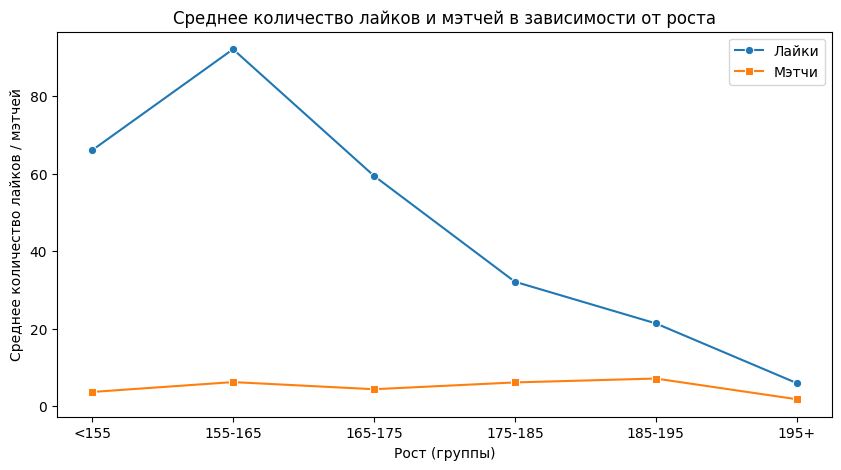

Группа 185-195: 85 элементов
Группа 165-175: 314 элементов
Группа 155-165: 165 элементов
Группа 175-185: 265 элементов
Группа <155: 17 элементов
Группа 195+: 6 элементов
ANOVA: p-value = 0.00003
Есть значимые различия в количестве лайков между разными группами роста.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# Удаляем строки с пропущенными значениями в ключевых столбцах
df_work = df_work.dropna(subset=['height', 'gender', 'likes_received_count', 'matches_count'])

# Проверим уникальные значения пола
print("Уникальные значения gender:", df_work['gender'].unique())

# Приведем gender к стандартному виду (если есть отличия в регистрах и форматах)
df_work['gender'] = df_work['gender'].str.lower().str.strip()

# 1. Гистограмма распределения роста по полу
plt.figure(figsize=(10,5))
sns.histplot(df_work[df_work['gender'] == 'm']['height'], bins=20, kde=True, color='blue', label='Мужчины', alpha=0.6)
sns.histplot(df_work[df_work['gender'] == 'f']['height'], bins=20, kde=True, color='red', label='Женщины', alpha=0.6)
plt.title("Распределение роста пользователей")
plt.xlabel("Рост (см)")
plt.ylabel("Частота")
plt.legend()
plt.show()

# 2. Анализ взаимосвязи роста и лайков/мэтчей
df_work['height_group'] = pd.cut(df_work['height'], bins=[140, 155, 165, 175, 185, 195, 210],
                                 labels=['<155', '155-165', '165-175', '175-185', '185-195', '195+'])

# Проверяем, есть ли пустые значения после разбиения на группы
print(df_work['height_group'].value_counts(dropna=False))

# Убираем строки с NaN в height_group (если есть)
df_work = df_work.dropna(subset=['height_group'])

# Среднее количество лайков и мэтчей по группам роста
# df_grouped1 = df_work.groupby('height_group')[['likes_received_count', 'matches_count']].mean().reset_index()
# # Группировка данных по диапазонам роста и расчет среднего количества лайков и мэтчей
df_grouped1 = df_work.groupby('height_group', observed=True)[['likes_received_count', 'matches_count']].mean().reset_index()


# 3. Визуализация лайков и мэтчей по росту
plt.figure(figsize=(10,5))
sns.lineplot(x='height_group', y='likes_received_count', data=df_grouped1, marker='o', label='Лайки')
sns.lineplot(x='height_group', y='matches_count', data=df_grouped1, marker='s', label='Мэтчи')
plt.title("Среднее количество лайков и мэтчей в зависимости от роста")
plt.xlabel("Рост (группы)")
plt.ylabel("Среднее количество лайков / мэтчей")
plt.legend()
plt.show()

# 4. Проверка значимости различий (ANOVA)
height_groups = [df_work[df_work['height_group'] == h]['likes_received_count'].dropna()
                 for h in df_work['height_group'].unique() if len(df_work[df_work['height_group'] == h]) > 1]

# Проверяем, что у нас есть данные в каждой группе
for i, g in enumerate(height_groups):
    print(f"Группа {df_work['height_group'].unique()[i]}: {len(g)} элементов")

# Проверка на пустые группы
if len(height_groups) > 1:
    stat, p_anova = f_oneway(*height_groups)
    print(f"ANOVA: p-value = {p_anova:.5f}")
    if p_anova < 0.05:
        print("Есть значимые различия в количестве лайков между разными группами роста.")
    else:
        print("Нет значимых различий в количестве лайков по росту.")
else:
    print("Недостаточно данных для ANOVA (менее 2 групп).")


Гипотеза 5. Мужчины чаще готовы принимать наличие детей у женщины-партнера, чем наоборот.

C:\Users\masik-saar\AppData\Local\Temp\ipykernel_18872\3209023485.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:, 'accepts_children'] = df_filtered['children'].isin(acceptable_children)
C:\Users\masik-saar\AppData\Local\Temp\ipykernel_18872\3209023485.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gender', y='accepts_children', data=acceptance_rates, palette=['blue', 'red'])


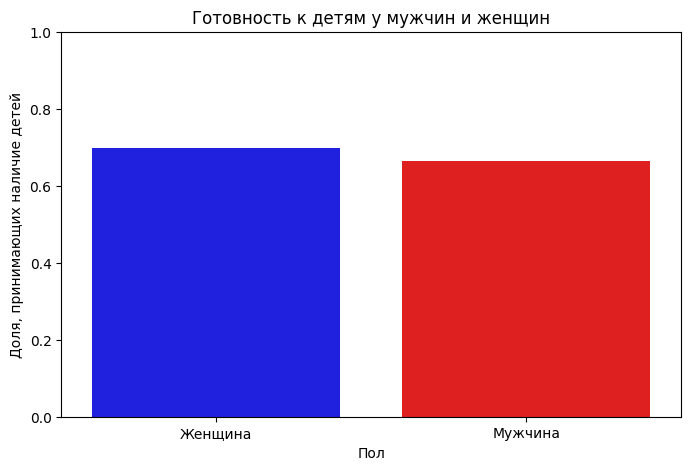

χ² тест: p-value = 0.38052
Нет значимых различий между мужчинами и женщинами в готовности к детям.


In [130]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Удаляем строки с пропущенными значениями в ключевых столбцах
df_filtered = df_work.dropna(subset=['gender', 'children'])

# Приводим gender к удобному формату
df_filtered.loc[:, 'gender'] = df_filtered['gender'].replace({'m': 'Мужчина', 'f': 'Женщина'})

# Категории, указывающие на готовность к детям
acceptable_children = ['Уже есть', 'Нет, но хотелось бы']

# Подсчет доли пользователей, готовых к детям
df_filtered.loc[:, 'accepts_children'] = df_filtered['children'].isin(acceptable_children)

# Группировка по полу
acceptance_rates = df_filtered.groupby('gender')['accepts_children'].mean().reset_index()

# Визуализация
plt.figure(figsize=(8, 5))
sns.barplot(x='gender', y='accepts_children', data=acceptance_rates, palette=['blue', 'red'])

plt.title('Готовность к детям у мужчин и женщин')
plt.xlabel('Пол')
plt.ylabel('Доля, принимающих наличие детей')
plt.ylim(0, 1)
plt.show()

# Статистическая проверка (χ² тест)
contingency_table = pd.crosstab(df_filtered['gender'], df_filtered['accepts_children'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"χ² тест: p-value = {p:.5f}")
if p < 0.05:
    print("Различия в готовности к детям между мужчинами и женщинами статистически значимы.")
else:
    print("Нет значимых различий между мужчинами и женщинами в готовности к детям.")


In [115]:
print(f"m : {len(df_work[df_work['gender'] == 'm'])}")
print(f"f : {len(df_work[df_work['gender'] == 'f'])}")

m : 576
f : 475


In [117]:
# Выбор нужных столбцов likes_given_count, likes_received_count
selected_columns = ["height", "education", "zodiac", "children", "about_len", "photo_count"]
new_df = df_work[selected_columns]

print("Новый датафрейм из выбранных столбцов:")
new_df

Новый датафрейм из выбранных столбцов:


,height,education,zodiac,children,about_len,photo_count
0,192.0,Среднее,gemini,"Нет, но хотелось бы",100,5
1,170.0,Высшее,capricorn,"Нет, но хотелось бы",35,6
2,160.0,Высшее,cancer,"Нет, но хотелось бы",110,6
3,194.0,Среднее,libra,Нет,130,3
4,180.0,Среднее,cancer,NaN,29,6
...,...,...,...,...,...,...
1054,NaN,NaN,aquarius,NaN,20,5
1055,187.0,Среднее,aries,Нет,297,3
1056,NaN,NaN,aries,NaN,34,6
1057,185.0,NaN,taurus,"Нет, но хотелось бы",63,3


In [118]:
new_df['children'].unique()

array(['Нет, но хотелось бы', 'Нет', nan, 'Уже есть'], dtype=object)